In [1]:
import scipy.stats as stats
import numpy as np
import pylab as plt
%matplotlib inline

In [2]:
a = 0
sigma = 1
gamma = 0.95

In [3]:
res = []
for n in range(1, 100):
    sample = np.random.normal(a, sigma, n)
    
    x_mean = 1 / n * np.sum(sample)
    x_sq_sum = np.sum([(x - a)**2 for x in sample])
    
    v1 = stats.norm.ppf((3 + gamma) / 4, 0, 1)
    u1 = stats.norm.ppf((3 - gamma) / 4, 0, 1)
    conf_interval_len1 = np.sqrt(n) * abs(x_mean - a) / u1 - np.sqrt(n) * abs(x_mean - a) / v1
    
    v2 = stats.chi2.ppf((1 + gamma) / 2, n, 0, 1)
    u2 = stats.chi2.ppf((1 - gamma) / 2, n, 0, 1)
    conf_interval_len2 = np.sqrt(x_sq_sum / u2) - np.sqrt(x_sq_sum / v2)
    
    res.append([n, conf_interval_len1, conf_interval_len2])
    

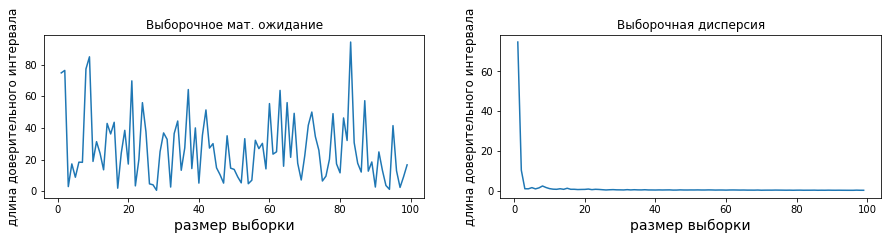

In [4]:
res = np.asarray(res)

plt.figure(figsize=(15, 3))
plt.subplot(121)
plt.title('Выборочное мат. ожидание')
plt.plot(res[:, 0], res[:, 1])
plt.ylabel('длина доверительного интервала', fontsize=12)
plt.xlabel('размер выборки', fontsize=14)

plt.subplot(122)
plt.title('Выборочная дисперсия')
plt.plot(res[:, 0], res[:, 2])
plt.ylabel('длина доверительного интервала', fontsize=12)
plt.xlabel('размер выборки', fontsize=14)

При построении доверительного интервала для дисперсии нормального распределения с заранее известным мат. ожиданием оказалось, что использование статистики выборочной дисперсии приводит к уменьшению доверительного интервала с увеличением размера выборки, тогда как для статистики выборочного мат. ожидания длина доверительного интервала не зависит от размера выборки. Для генерации выборки было использовано нормальное распределение с мат. ожиданием = 0 и дисперсией = 1.